## 주성분 분석

In [4]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris(as_frame=True)

In [6]:
df=iris['data']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
# 데이터의 레이블 (3개의 서로 다른 꽃의 종으로 구성되어 있음)
iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## 데이터를 평균 0, 표준편차가 1이 되도록 정규화

In [7]:
df_norm = (df-df.mean())/df.std()

## 주성분 분석 적용

In [23]:
from sklearn.decomposition import PCA
pca = PCA() # 주성분 분석 수행을 위한 객체 생성
# pca.fit(df_norm) # 학습
# Z=pca.transform(df_norm) #예측
Z = pca.fit_transform(df_norm) # fit_transform을 통해 학습과 함께 새로운 차원 Z로 변환

In [24]:
Z.shape

(150, 4)

## 각 차원의 중요도 파악

학습된 pca 객체 내부의 멤버 변수들을 살펴봄으로써 확인 가능하다

In [16]:
importance = pca.explained_variance_
importance

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

## 각 차원의 중요도를 비율로 설명

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## 중요도의 누적합

numpy에 있는 cumsum이라는 누적합을 계산해 주는 메소드를 사용하면 쉽계 계산이 가능

In [18]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

## 변환원 데이터의 특정 차원 선택

변환된 데이터에서 열을 선택함으로써 변환된 데이터의 특정 차원을 선택할 수 있다

In [20]:
Z.shape

(150, 4)

In [21]:
Z[:,0] # 첫번째 열 -> 변환된 데이터의 첫번째 차원

array([-2.25714118, -2.07401302, -2.35633511, -2.29170679, -2.3818627 ,
       -2.06870061, -2.43586845, -2.22539189, -2.32684533, -2.17703491,
       -2.15907699, -2.31836413, -2.2110437 , -2.62430902, -2.19139921,
       -2.25466121, -2.20021676, -2.18303613, -1.89223284, -2.33554476,
       -1.90793125, -2.19964383, -2.76508142, -1.81259716, -2.21972701,
       -1.9453293 , -2.04430277, -2.1613365 , -2.13241965, -2.25769799,
       -2.13297647, -1.82547925, -2.60621687, -2.43800983, -2.10292986,
       -2.20043723, -2.03831765, -2.51889339, -2.42152026, -2.16246625,
       -2.27884081, -1.85191836, -2.54511203, -1.95788857, -2.12992356,
       -2.06283361, -2.37677076, -2.38638171, -2.22200263, -2.19647504,
        1.09810244,  0.72889556,  1.2368358 ,  0.40612251,  1.07188379,
        0.38738955,  0.74403715, -0.48569562,  0.92480346,  0.01138804,
       -0.10982834,  0.43922201,  0.56023148,  0.71715934, -0.03324333,
        0.87248429,  0.34908221,  0.1582798 ,  1.22100316,  0.16

In [22]:
Z[:,1] # 두번째 열 -> 변환된 데이터의 두번째 차원

array([ 0.47842383, -0.67188269, -0.34076642, -0.59539986,  0.64467566,
        1.4842053 ,  0.04748512,  0.222403  , -1.1116037 , -0.46744757,
        1.04020587,  0.132634  , -0.72624318, -0.95829635,  1.85384655,
        2.67731523,  1.47865573,  0.48720613,  1.40032757,  1.1240836 ,
        0.40749058,  0.92103587,  0.4568133 ,  0.08527285,  0.13679618,
       -0.62352971,  0.24135499,  0.52538942,  0.312172  , -0.33660425,
       -0.50285608,  0.42228039,  1.78758727,  2.1435468 , -0.45866527,
       -0.20541922,  0.65934923,  0.59031516, -0.90116107,  0.2679812 ,
        0.44024054, -2.32961074, -0.47750102,  0.47074961,  1.13841546,
       -0.70867859,  1.11668869, -0.38495723,  0.99462767,  0.00918558,
        0.86009103,  0.59262936,  0.61423989, -1.7485462 , -0.20772515,
       -0.59130272,  0.77043827, -1.846244  ,  0.03211848, -1.03056578,
       -2.64521111, -0.06308385, -1.75883213, -0.18560282, -0.43753742,
        0.50736424, -0.19565627, -0.78945101, -1.61682728, -1.29

## Visualization

Text(0, 0.5, 'second dimension')

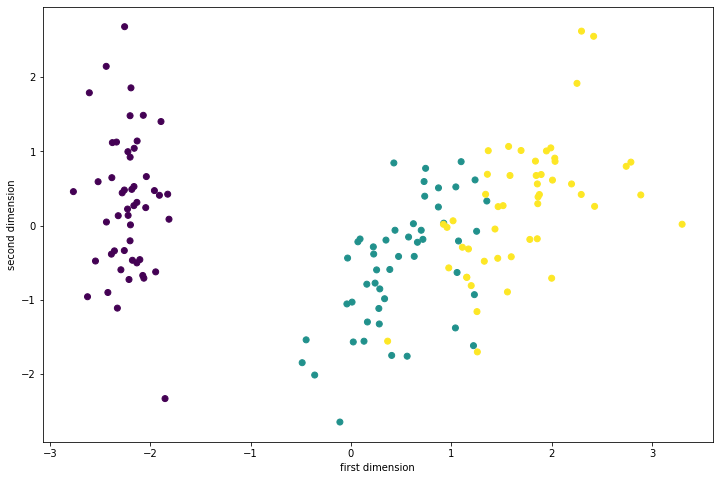

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1], c=iris['target'])
plt.xlabel("first dimension")
plt.ylabel("second dimension")

## 변환된 차원에 의미부여

In [31]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [47]:
# 고유행렬에서 첫 2행까지의 데이터를 추려내자
factor = pca.components_[:2,:]
factor

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

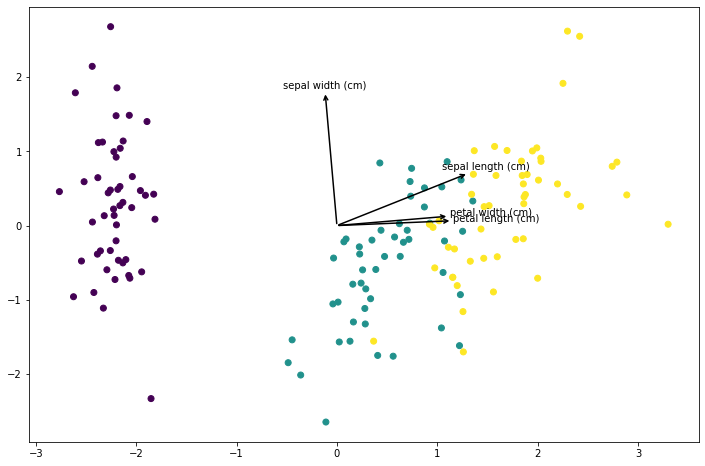

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=iris['target'])
for i in range(4):
    plt.annotate(df.columns[i],xy=(0,0),xytext=(factor[:,i]*2),arrowprops={'lw':1.5, 'arrowstyle':'<-'})